In [1]:
from keras.datasets import cifar10#importing dataset
import keras
from keras.models import Sequential
from keras.layers import Activation,Conv2D,BatchNormalization,Dense,Flatten,AveragePooling2D,Dropout
import matplotlib.pyplot as plt # visualization
%matplotlib inline

Using TensorFlow backend.


In [2]:
#downloading data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


[9]


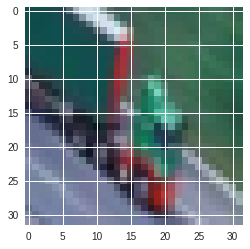

In [3]:
i=50 # any random number would work between 0 and 49999
plt.imshow(x_train[i]) # To see the image
print(y_train[i]) # Corresponding output

In [0]:
# Time to change y to categorical for so that the outputs can be matched
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
model=Sequential()

# making the model
# input>conv2d>>relu>BatchNom>conv2d>relu>BatchNorm>AveragePool

model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2)))

#>conv2d>>relu>BatchNom>conv2d>relu>BatchNorm>AveragePool

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2)))

#flatten>Dense>BatchNorm>relu>softmax(output)

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
#Checking our model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
average_pooling2d_1 (Average (None, 16, 16, 32)        0         
__________

In [0]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

# Setting up callback function

early=EarlyStopping(patience=10) # if no changes are seen the model willstop training

reduce=ReduceLROnPlateau(monitor='val_acc',factor=0.5,patience=3,min_lr=0.00001,verbose=1) #if significant change is not seen
# the model will decrease the learning rate

callback=[early,reduce]

In [0]:
# Compiling the model
model.compile(loss='categorical_crossentropy', #loss function
              optimizer='adam', #here we are using adam optimizer
              metrics=['accuracy'])

In [0]:
# changing type to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# one value can vary upto 255
x_train /= 255
x_test /= 255

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# checking shape and initializing no of epochs and batch size
total_test=x_test.shape[0]
total_train=x_train.shape[0]
epochs=50
batch=25

In [14]:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history=model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        validation_steps=total_test//batch,
                        steps_per_epoch=total_train//batch,
                        callbacks=callback,
                        workers=4)

Using real-time data augmentation.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
2000/2000 [==============================] - 56s 28ms/step - loss: 1.3054 - acc: 0.5386 - val_loss: 0.9911 - val_acc: 0.6591
Epoch 2/50
2000/2000 [==============================] - 54s 27ms/step - loss: 0.9022 - acc: 0.6830 - val_loss: 1.1681 - val_acc: 0.6019
Epoch 3/50
2000/2000 [==============================] - 53s 27ms/step - loss: 0.7660 - acc: 0.7346 - val_loss: 0.6582 - val_acc: 0.7726
Epoch 4/50
2000/2000 [==============================] - 53s 27ms/step - loss: 0.6856 - acc: 0.7639 - val_loss: 0.7206 - val_acc: 0.7527
Epoch 5/50
2000/2000 [==============================] - 54s 27ms/step - loss: 0.6217 - acc: 0.7850 - val_loss: 0.6277 - val_acc: 0.7888
Epoch 6/50
2000/2000 [==============================] - 54s 27ms/step - loss: 0.5737 - acc: 0.8025 - val_loss: 0.5387 - val_acc: 0.8176
Epoch 7/50
2000/2000 [==============================] - 54s 27ms/step - loss: 0.5388 - acc: 0.8124 - 

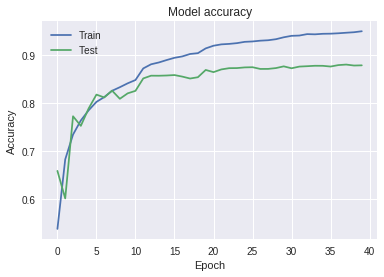

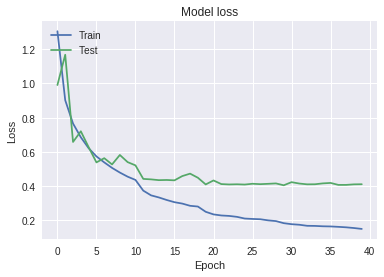

In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
#saving the predictions probabilities
predict=model.predict(x_test)

In [0]:
import numpy as np
#Saving pridiction probability to answer presicted
predic={
    'probability':np.amax(predict,axis=1),
    'answer':np.argmax(predict,axis=1)
}

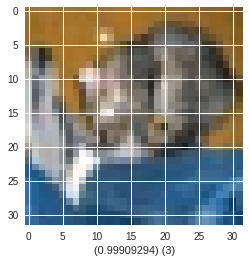

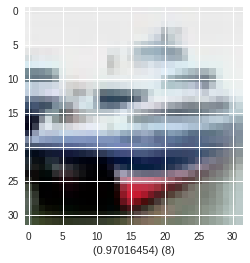

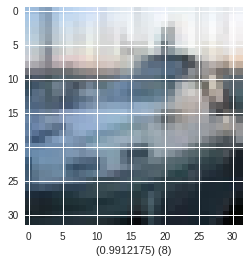

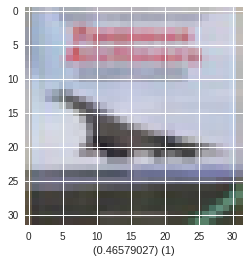

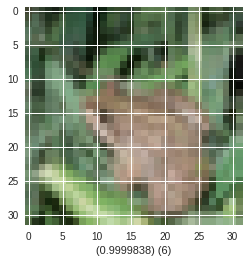

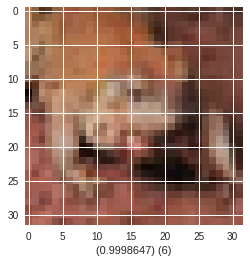

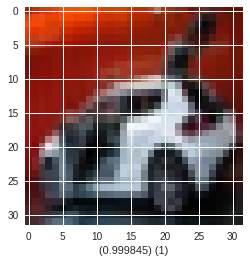

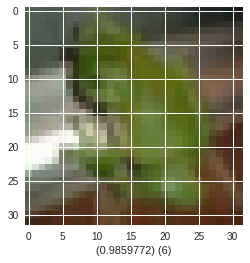

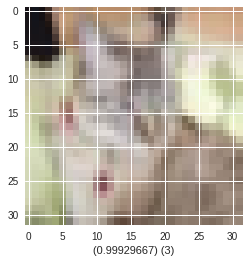

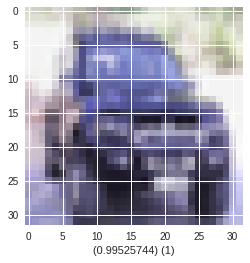

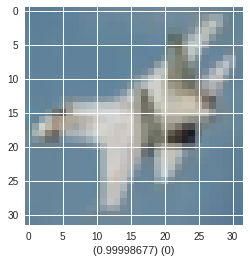

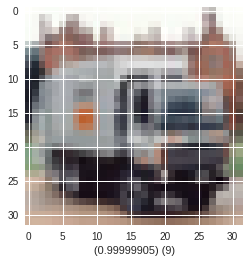

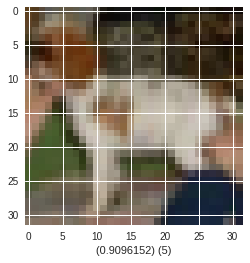

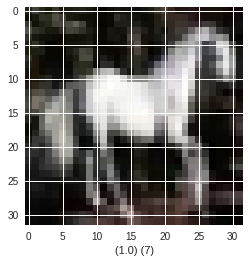

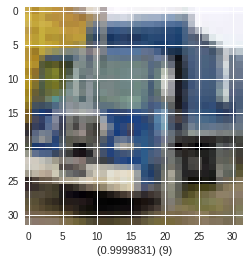

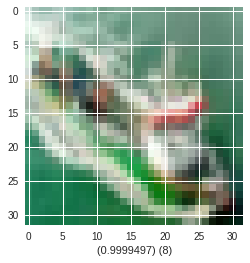

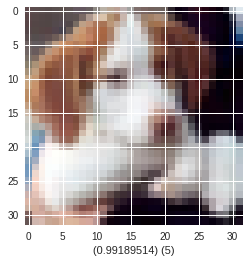

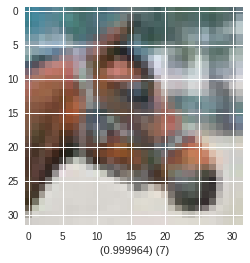

In [20]:
#Checking some examples
for x in range(18):
  plt.imshow(x_test[x][:])
  a="("+str(predic['probability'][x])+") ("+str(predic['answer'][x])+")"
  plt.xlabel(a)
  plt.show()

In [0]:
#Saving our model
path = "../content/drive/My Drive/" 
model.save(path+'cifar_model.h5') 
model.save_weights(path+'cifar_model_weight.h5')